# Clustering

## k-Means Clustering

![](https://chrisalbon.com/images/machine_learning_flashcards/K-Means_Clustering_print.png)

In [1]:
# Load libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Load Iris Flower Dataset

In [2]:
# Load data
iris = datasets.load_iris()
X = iris.data

### Standardize Features

In [3]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Conduct k-Means Clustering

In [4]:
# Create k-mean object
clt = KMeans(n_clusters=3, random_state=0, n_jobs=-1)

# Train model
model = clt.fit(X_std)

### Show Each Observation’s Cluster Membership

In [5]:
# View predict class
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

### Predict Observation’s Cluster

In [6]:
# Create new observation
new_observation = [[0.8, 0.8, 0.8, 0.8]]

# Predict observation's cluster
model.predict(new_observation)

array([0], dtype=int32)

### View Centers Of Each Cluster


In [7]:
# View cluster centers
model.cluster_centers_


array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

## Mini-Batch k-Means Clustering

Mini-batch k-means works similarly to the k-means algorithm discussed in the last recipe. Without going into too much detail, the difference is that in mini-batch k-means the most computationally costly step is conducted on only a random sample of observations as opposed to all observations. This approach can significantly reduce the time required for the algorithm to find convergence (i.e. fit the data) with only a small cost in quality.

In [8]:
from sklearn.cluster import MiniBatchKMeans

# Create k-mean object
clustering = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)

# Train model
model = clustering.fit(X_std)

In [9]:
# Create new observation
new_observation = [[0.8, 0.8, 0.8, 0.8]]

# Predict observation's cluster
model.predict(new_observation)

array([2], dtype=int32)

In [10]:
# View cluster centers
model.cluster_centers_


array([[ 0.05652461, -0.84911604,  0.40030007,  0.33095522],
       [-1.03449912,  0.8437061 , -1.30613571, -1.25777943],
       [ 1.2202968 ,  0.19381492,  1.05157928,  1.09451463]])

## Evaluating Clustering

Elbow Method: visualize the clusters according to some scoring function, look for an “elbow” in the curve.

In [13]:
%matplotlib inline

In [16]:
from sklearn.datasets import make_blobs

# Create synthetic dataset with 8 random clusters
X, y = make_blobs(centers=8, n_features=12, shuffle=True, random_state=42)

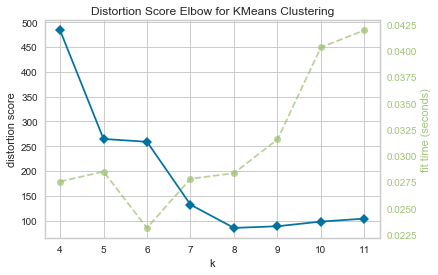

In [17]:

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

By default, the scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer – silhouette and calinski_harabaz. The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabaz score computes the ratio of dispersion between and within clusters.

The KElbowVisualizer also displays the amount of time to train the clustering model per K as a dashed green line, but is can be hidden by setting timings=False. In the following example, we’ll use the calinski_harabaz score and hide the time to fit the model.

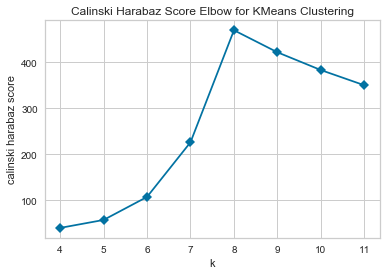

In [18]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabaz', timings=False
)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data